In [9]:
import pandas as pd
import datetime
def toDateTime(st):
    return datetime.datetime.strptime(st, '%Y-%m-%d %H:%M:%S')

path = '/Users/maxschallwig/Downloads/'
name = '200603011521_subscribers_0f1c72b4_active.csv'

df = pd.read_csv(path+name)
df['Subscribed'] = df['Subscribed'].apply(toDateTime)
df.head()

,Email,Emails sent,Opened,Clicked,Subscribed,Location,Signup IP,Signup Timestamp,Confirmation IP,Confirmation Timestamp
0,hardtrib@icloud.com,1,0,0,2020-06-03 01:11:34,NaN,NaN,NaN,NaN,NaN
1,mhmulford0@gmail.com,1,1,0,2020-06-02 23:49:37,NaN,NaN,NaN,NaN,NaN
2,appukamsy@gmail.com,1,0,0,2020-06-02 23:48:09,NaN,NaN,NaN,NaN,NaN
3,surajit1304@gmail.com,0,0,0,2020-06-02 23:45:21,NaN,NaN,NaN,NaN,NaN
4,anasofia.wacker@gmail.com,1,0,0,2020-06-02 23:42:46,NaN,NaN,NaN,NaN,NaN


In [41]:
ct = datetime.datetime.now()
week = []
openRate = []
CTR = []
OP = []
subs = []
open1 = []
open2 = []
open3 = []
for i in range(10):
    dfC = df.loc[(df['Subscribed']<ct) & (df['Subscribed']>=ct-datetime.timedelta(days=7))]
    emails = dfC['Emails sent'].sum()
    opens = dfC['Opened'].sum()
    clicks = dfC['Clicked'].sum()
    us = dfC['Email'].nunique()
    open1.append(dfC.loc[dfC['Clicked']>=1]['Email'].nunique())
    open2.append(dfC.loc[dfC['Clicked']>=2]['Email'].nunique())
    open3.append(dfC.loc[dfC['Clicked']>=3]['Email'].nunique())
    ctr = clicks/opens*100
    oR = opens/emails*100
    OP.append(opens)
    subs.append(us)
    week.append(ct.date())
    openRate.append(oR)
    CTR.append(ctr)
    ct -= datetime.timedelta(days=7)

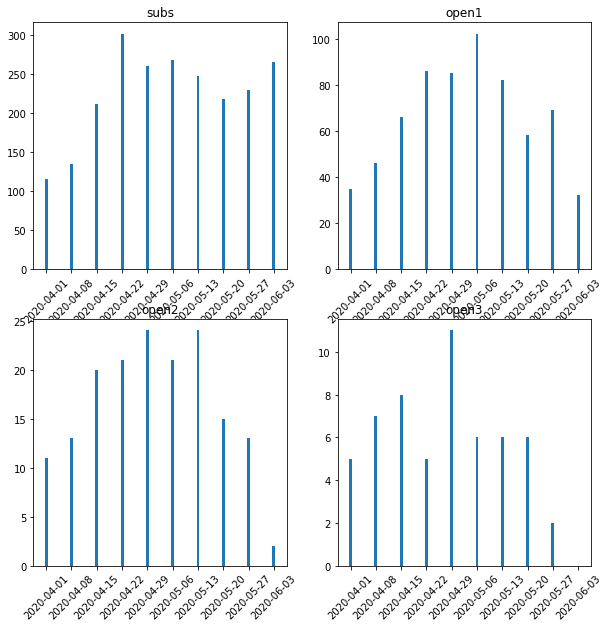

In [42]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
for i,h,n in zip([0,1,2,3],[subs,open1,open2,open3],['subs','open1','open2','open3']):
    ax = fig.add_subplot(2,2,i+1)
    plt.bar(x=week,height=h)
    plt.title(n)
    plt.xticks(week,week,rotation=45)
plt.show()